In [23]:
#importing libraries
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from pathlib import Path
import random
import warnings
warnings.filterwarnings('ignore')

In [24]:
#setting seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [25]:
data_root_path = r'C:\Users\Administrator\Digital Africa\Diabetic_Retinopathy\train'
total_classes = os.listdir(data_root_path)
print(total_classes)

['DR', 'No_DR']


In [26]:
#loading images and labels
def load_data(data_path):
    images = []
    labels = []
    for label, category in enumerate(total_classes):
        category_path = Path(data_path) / category
        for image_path in category_path.glob('*.jpg'):
            img = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
            img_array = tf.keras.preprocessing.image.img_to_array(img)
            images.append(img_array)
            labels.append(label)
    return np.array(images), np.array(labels)

In [27]:
X, y = load_data(data_root_path)
print(f'Total images: {len(X)}, Total labels: {len(y)}')

Total images: 2076, Total labels: 2076


In [28]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify = y, random_state=42)

In [29]:
#normalizing the data
X_train = X_train / 255.0
X_test = X_test / 255.0

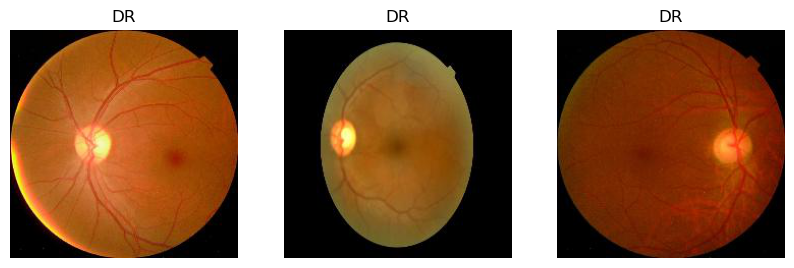

In [30]:
#identifying the class label for DR
DR_label = 1

# Filter images belonging to the DR class
DR_indices = np.where(y_train == DR_label)[0]

plt.figure(figsize=(10, 10))
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(X_train[DR_indices[i]])
  plt.title("DR")
  plt.axis("off")

plt.show()

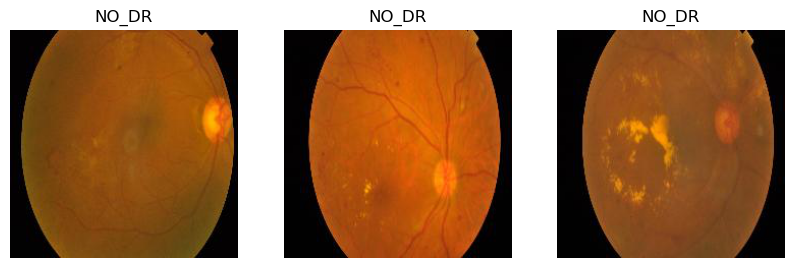

In [31]:
#identifying the class label for NO_DR
NO_DR_label = 0

# Filter images belonging to the NO_DR class
NO_DR_indices = np.where(y_train == NO_DR_label)[0]


plt.figure(figsize=(10, 10))
for i in range(3):
  ax = plt.subplot(1, 3, i + 1)
  plt.imshow(X_train[NO_DR_indices[i]])
  plt.title("NO_DR")
  plt.axis("off")
plt.show()

In [32]:
#building the neural network architecture
model = Sequential([
    Conv2D(64, kernel_size = (3, 3), input_shape = (224, 224, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2, 2)),
    Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(64, kernel_size = (3, 3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    Flatten(),
    Dense(len(y), activation = 'sigmoid')
    
])

In [33]:
#compiling the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [34]:
#training the model
history = model.fit(X_train, y_train, epochs = 10, batch_size = 16, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.6932 - loss: 1.1183 - val_accuracy: 0.9279 - val_loss: 0.1928
Epoch 2/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 239s 2s/step - accuracy: 0.8975 - loss: 0.2467 - val_accuracy: 0.9279 - val_loss: 0.1772
Epoch 3/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 217s 2s/step - accuracy: 0.9141 - loss: 0.2332 - val_accuracy: 0.9423 - val_loss: 0.1573
Epoch 4/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.9286 - loss: 0.2263 - val_accuracy: 0.9471 - val_loss: 0.1441
Epoch 5/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 226s 2s/step - accuracy: 0.9265 - loss: 0.2091 - val_accuracy: 0.9423 - val_loss: 0.1374
Epoch 6/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.9314 - loss: 0.1975 - val_accuracy: 0.9663 - val_loss: 0.1279
Epoch 7/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.9368 - loss: 0.1850 - val_accuracy: 0.9663 - val_loss: 0.1268
Epoch 8/10
117/117 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.9375 - loss: 0.1757 - val_accu

In [35]:
#evaluating the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 1)
print(f'Test Accuracy: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 351ms/step - accuracy: 0.9538 - loss: 0.1200
Test Accuracy: 0.9567307829856873


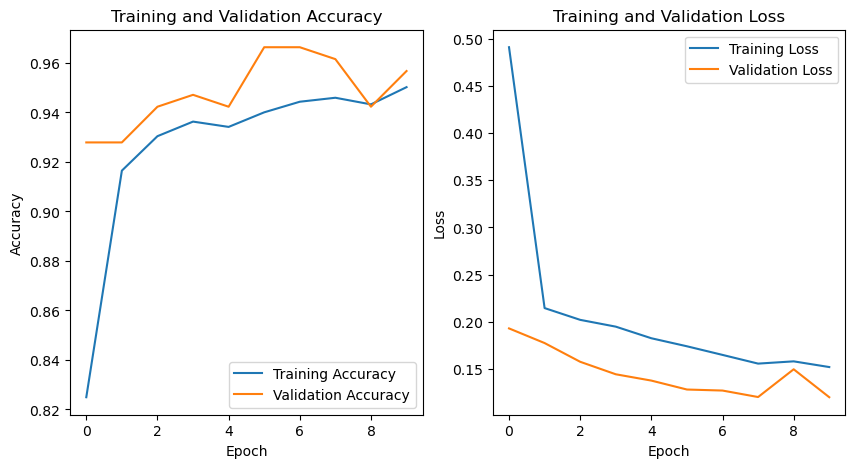

In [36]:
#visualizing the training and validation loss and accuracy
plt.figure(figsize = (10,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()